In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, Numeric, String, Date
from sqlalchemy.ext.declarative import declarative_base


In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [ ]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [ ]:
# View all of the classes that automap found
for cls in Base.classes:
    print(cls.__table__.name)

measurement
station


In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
print(recent_date)


2017-08-23


,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


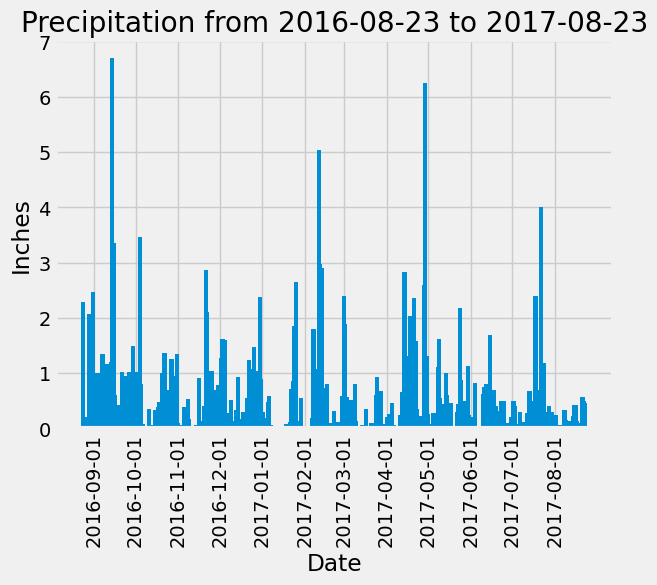

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set (2016-08-23)
one_year_date = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query1df = pd.DataFrame(query1, columns = ["date", "precipitation"])
display(query1df)

# Set the index to the date column and sort the dataframe by date
query1df.set_index("date", inplace=True)
query1df = query1df.sort_values("date")

#Plot bar graph
plt.bar(query1df.index, query1df["precipitation"], width=3)

# Set the x-axis ticks and labels
plt.xticks(
    pd.date_range(
        start=query1df.index.min(),
        end=query1df.index.max(),
        freq='MS'
    ).strftime('%Y-%m-%d'),
    rotation=90
)

plt.xlabel("Date")
plt.ylabel("Inches")
plt.title(f"Precipitation from {one_year_date.strftime('%Y-%m-%d')} to {recent_date}")
plt.show()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_count = query1df["precipitation"].count()
prcp_mean = query1df["precipitation"].mean()
prcp_std = query1df["precipitation"].std()
prcp_min = query1df["precipitation"].min()
prcp_max = query1df["precipitation"].max()
prcp_q1 = query1df['precipitation'].quantile(0.25)
prcp_q2 = query1df['precipitation'].quantile(0.5)
prcp_q3 = query1df['precipitation'].quantile(0.75)

#create dictionary for DataFrame
prcp_dict = {' ': ["count", "mean", "min", "max", "std. dev.", "25%", "50%", "75%"],
             "precipitation" : [prcp_count, 
                                prcp_mean, 
                                prcp_min, 
                                prcp_max, 
                                prcp_std, 
                                prcp_q1, 
                                prcp_q2, 
                                prcp_q3]

}

# Create DataFrame
prcp_df = pd.DataFrame(prcp_dict)

# Display DataFrame
prcp_df



,,precipitation
0,count,2015.000000
1,mean,0.176462
2,min,0.000000
3,max,6.700000
4,std. dev.,0.460288
5,25%,0.000000
6,50%,0.020000
7,75%,0.130000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
print(f"station count: {station_count}.")

station count: [(9,)].


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# By descending order
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the first tuple
print(station_counts[0])

# Format and list title
print(" ")
print("Stations by counted measurements, in descending order:")

# Print the station list
for station, count in station_counts:
    print(f"Station: {station} - Count: {count}")


('USC00519281', 2772)
 
Stations by counted measurements, in descending order:
Station: USC00519281 - Count: 2772
Station: USC00519397 - Count: 2724
Station: USC00513117 - Count: 2709
Station: USC00519523 - Count: 2669
Station: USC00516128 - Count: 2612
Station: USC00514830 - Count: 2202
Station: USC00511918 - Count: 1979
Station: USC00517948 - Count: 1372
Station: USC00518838 - Count: 511


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_counts[0]
most_active_id = most_active_station[0]

# Write query
query3 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_id)

# Track result, rather than translate query to normal SQL code
result3 = query3.first()

# Print answers
print(f"At station {most_active_id}, the lowest temperature was {result3[0]}, the highest temperature was {result3[1]}, and the average temperature was {result3[2]}.")

At station USC00519281, the lowest temperature was 54.0, the highest temperature was 85.0, and the average temperature was 71.66378066378067.


,date,temperature (f)
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


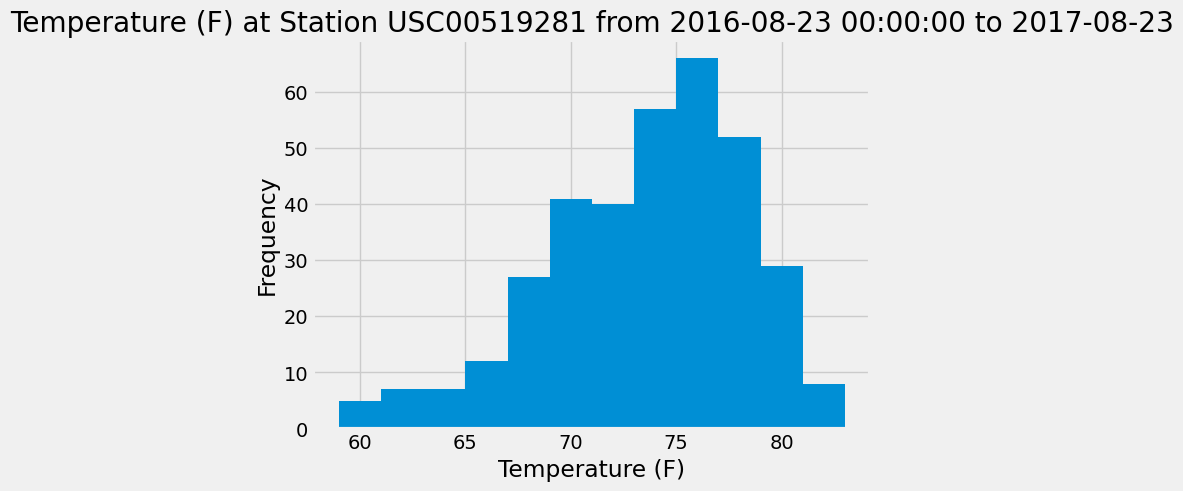

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Use one_year_date variable from query1
query4 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_date).\
    filter(Measurement.station == most_active_id).\
    order_by(Measurement.date).all()

# Create DataFrame of query results
query4df = pd.DataFrame(query4, columns = ["date", "temperature (f)"])
# display DataFrame
display(query4df)

# plot the histogram
plt.hist(query4df["temperature (f)"], bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.title(f"Temperature (F) at Station {most_active_id} from {one_year_date} to {recent_date}")
plt.show()


# Close Session

In [ ]:
# Close Session
session.close()